Number of PDF files processed: 9
Sample data:
                                           file_name  \
0                        CELEX_32018L2001_EN_TXT.pdf   
1                        CELEX_32019L0944_EN_TXT.pdf   
2                        CELEX_32023L1791_EN_TXT.pdf   
3                        CELEX_32023R0955_EN_TXT.pdf   
4  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   

                                                text  
0  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...  
1  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...  
2  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...  
3  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...  
4   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  


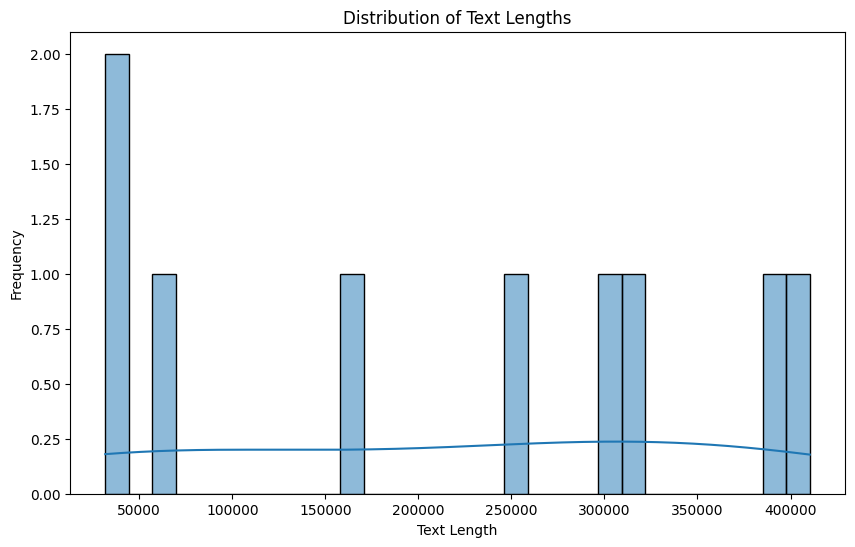

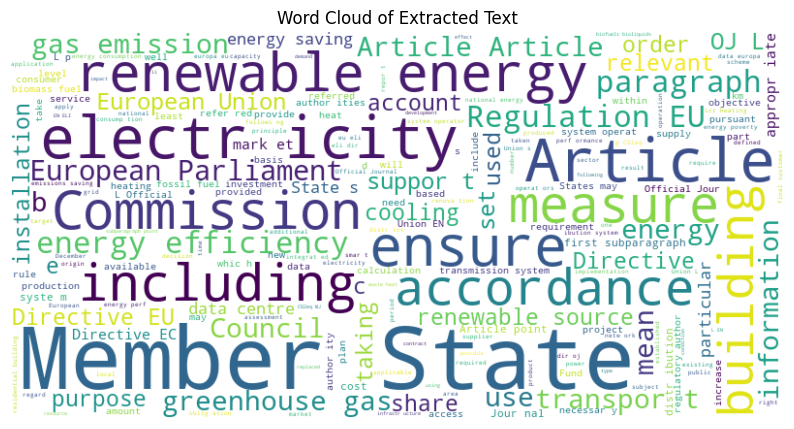

Processed data saved to processed_data.csv


In [ ]:
# Import necessary libraries
import os
import pandas as pd
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# define function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

# Define directory containing PDF files
pdf_dir = r"C:\Users\akers\OneDrive\Documenten\GitHub\Datalab-V\Training_set_text\European_policies"

# Extract text from all PDF files in the directory
data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

# Create a DataFrame
df = pd.DataFrame(data)

# Basic EDA
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

# Add column for text length
df['text_length'] = df['text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Generate a word cloud for the combined text
all_text = " ".join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text")
plt.show()

# Save the processed data for LLM input
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

In [10]:
import re
def clean_text(text):
    # Remove extra whitespace, newlines, and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'[^\w\s.,!?]', '', text)  # Remove special characters except punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

In [9]:
from transformers import AutoTokenizer
tokenizer_name = "gpt2"  # Replace with your model's tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\akers\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})

# Create a DataFrame for the processed data
df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data_chunks.json
